# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset


In [5]:
# Set style for better visuals
sns.set_style("whitegrid")

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/insurance.csv')

# Dataset head
print(df.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


# Basic EDA

In [24]:
# Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# Dataset shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns\n')

There are 1338 rows and 7 columns



In [15]:
# Dataset Type
print(f'Dataset Type of Each Column: \n {df.dtypes} \n')

Dataset Type of Each Column: 
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object 



In [16]:
# Check Null Values
print(f'Check Null Values in the Dataset: \n{df.isnull().sum().sort_values(ascending=False)}')

Check Null Values in the Dataset: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [25]:
# Check Descriptive Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [21]:
# Check Columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# Visualizaions

## Histogram Plot

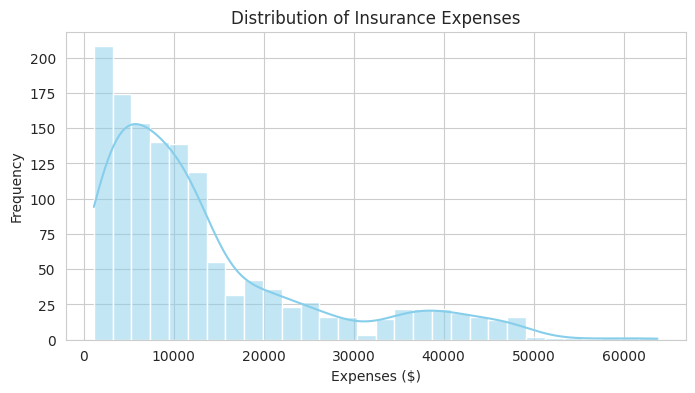

In [7]:
# 1. Histogram of expenses
plt.figure(figsize=(8, 4))
sns.histplot(df['expenses'], kde=True, color='skyblue')
plt.title('Distribution of Insurance Expenses')
plt.xlabel('Expenses ($)')
plt.ylabel('Frequency')
plt.show()

## Bar Chart

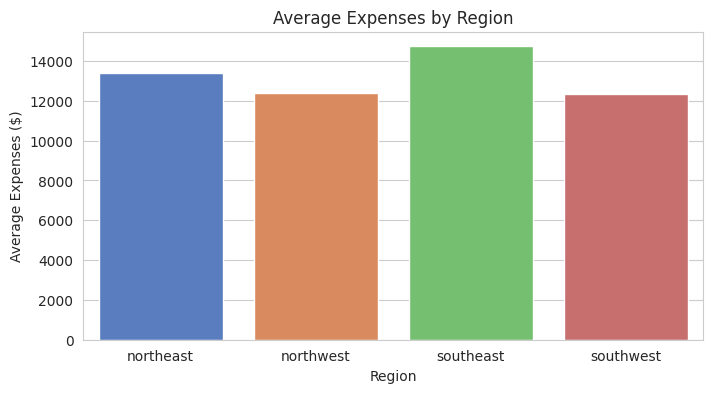

In [8]:
# 2. Bar chart of average expenses by region
region_expenses = df.groupby('region')['expenses'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='region', y='expenses', data=region_expenses, hue='region', palette='muted', legend=False)
plt.title('Average Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Average Expenses ($)')
plt.show()

## Pie Chart

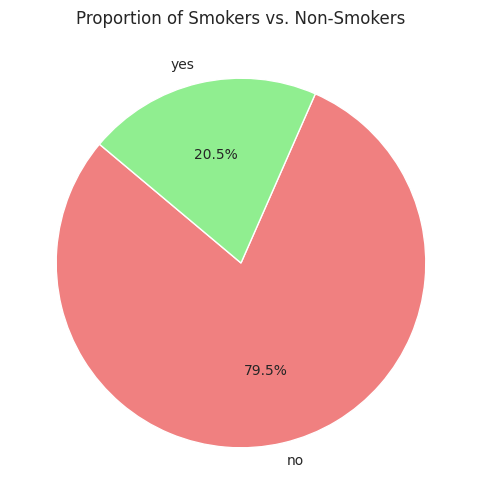

In [9]:
# 3. Pie chart of smoker status
smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Smokers vs. Non-Smokers')
plt.show()

## Scatter Plot

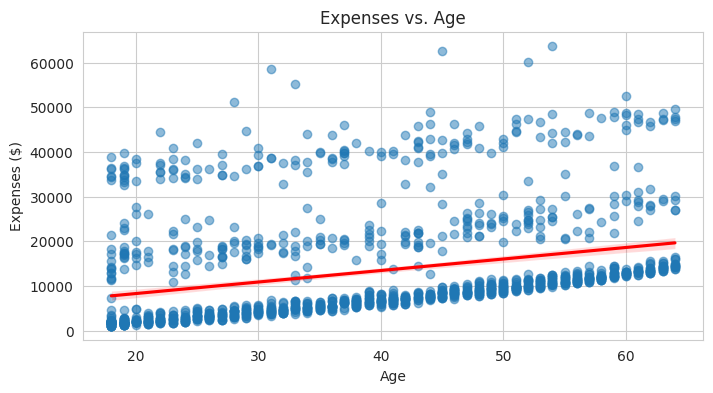

In [10]:
# 4. Scatter plot with regression line: expenses vs. age
plt.figure(figsize=(8, 4))
sns.regplot(x='age', y='expenses', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Expenses vs. Age')
plt.xlabel('Age')
plt.ylabel('Expenses ($)')
plt.show()

## Heatmap

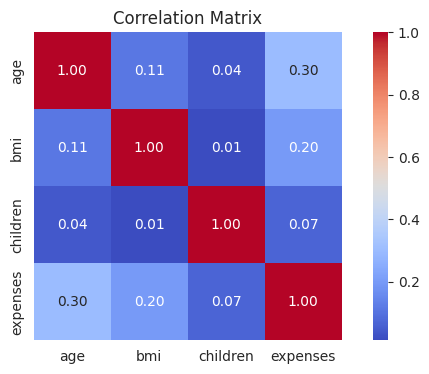

In [11]:
# 5. Heatmap of correlation matrix
plt.figure(figsize=(8, 4))
numerical_cols = ['age', 'bmi', 'children', 'expenses']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

## Box Plot

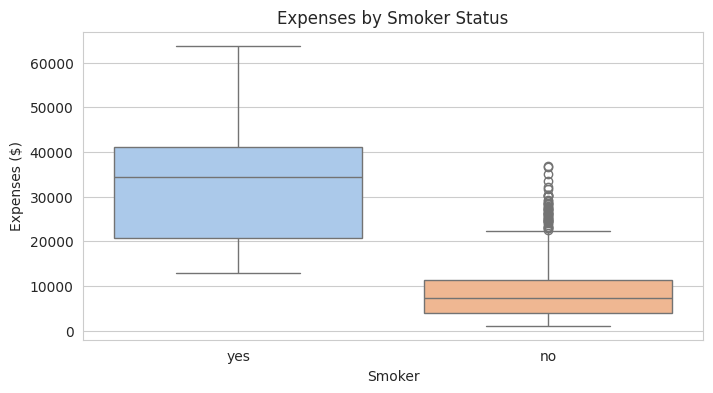

In [12]:
# 6. Box plot: expenses by smoker
plt.figure(figsize=(8, 4))
sns.boxplot(x='smoker', y='expenses', data=df, hue='smoker', palette='pastel', legend=False)
plt.title('Expenses by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Expenses ($)')
plt.show()

## Violin Plot

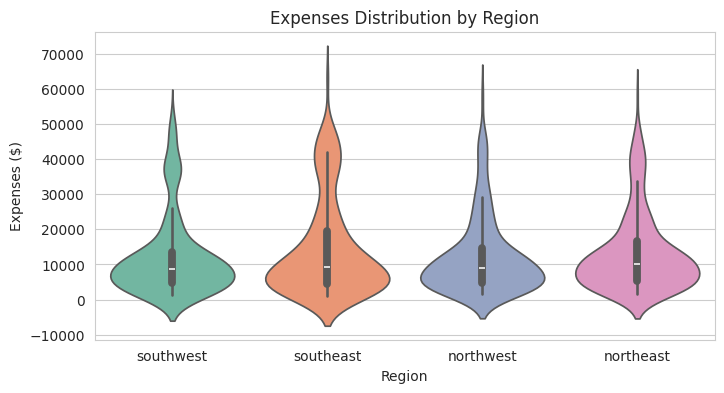

In [13]:
# 7. Violin plot: expenses by region
plt.figure(figsize=(8, 4))
sns.violinplot(x='region', y='expenses', data=df, hue='region', palette='Set2', legend=False)
plt.title('Expenses Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Expenses ($)')
plt.show()